In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pylab as plt
import lsst.sims.maf.db as db
import lsst.sims.maf.metrics as metrics
import lsst.sims.maf.slicers as slicers
import lsst.sims.maf.stackers as stackers
import lsst.sims.maf.plots as plots
import lsst.sims.maf.metricBundles as metricBundles
import lsst.sims.maf.utils as utils

In [2]:
class BruteOSFMetric(metrics.BaseMetric):
    """Assume I can't trust the slewtime or visittime colums"""
    def __init__(self, metricName='BruteOSFMetric',
            expTimeCol='expTime', mjdCol='expMJD', maxgap=10., fudge=0, **kwargs):
        self.expTimeCol = expTimeCol
        self.maxgap = maxgap/60./24. # convert from min to days
        self.mjdCol = mjdCol
        self.fudge = fudge
        super(BruteOSFMetric, self).__init__(col=[self.expTimeCol, mjdCol],
                                                        metricName=metricName, units='OpenShutter/TotalTime',
                                                        **kwargs)
                                                                                                        
    def run(self, dataSlice, slicePoint=None):
        times = np.sort(dataSlice[self.mjdCol])
        diff = np.diff(times)
        good = np.where(diff < self.maxgap)
        openTime = np.sum(diff[good])*24.*3600.
        result = np.sum(dataSlice[self.expTimeCol]+self.fudge) / float(openTime)
        return result

In [3]:
conns = []
colmap_dict = {'slewtime': 'slewtime', 'exptime': 'exptime', 'visittime': 'exptime', 'mjd':'mjd'}

files = ['one_filter_south.db','one_filter_north.db',  'one_filter.db',
         'one_filter_dd.db', 'six_filter.db', 'one_filter_pairs.db', 'one_filter_north_pairs.db',
         'one_filter_10yr.db', 'one_filter_dither.db', 'rolling_1.db', 'rolling_2.db', 'full_nside32_fast_2.db']
labels=['South', 'North',  'Full Sky', 'DD', '6 Filters', 'Pairs', 'North Pairs', '10-year',
        'Dithered', 'Rolling 1yr', 'Rolling 2yr', '6 filt+DD, dithered, 2 years']

conns = [db.Database(file) for file in files]

Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with no constraint for columns ['dec', 'mjd', 'airmass', 'RA', 'exptime'].
Found 304119 visits
Running:  ['one_filter_south_db_BruteOSFMetric_UNIS', 'one_filter_south_db_Median_normairmass_UNIS']
Completed metric generation.
Running:  ['one_filter_south_db_PairFraction_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.
monopole: -0.672385  dipole: lon: 140.039, lat: -82.2154, amp: 1.11105
Plotting complete.
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with no constraint for columns ['dec', 'mjd', 'airmass', 'RA', 'exptime'].
Found 293802 visits
Running:  ['one_filter_north_db_BruteOSFMetric_UNIS', 'one_filter_north_db_Median_normairmass_UNIS']
Completed metric generation.
Running:  ['one_filter_north_db_PairFraction_HEAL']
Com

/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 0.954416  dipole: lon: -66.3657, lat: 61.7529, amp: 0.0457328
Plotting complete.
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with no constraint for columns ['dec', 'mjd', 'airmass', 'RA', 'exptime'].
Found 3022980 visits
Running:  ['one_filter_10yr_db_BruteOSFMetric_UNIS', 'one_filter_10yr_db_Median_normairmass_UNIS']
Completed metric generation.
Running:  ['one_filter_10yr_db_PairFraction_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 0.0893017  dipole: lon: -177.89, lat: -44.3388, amp: 0.118547
Plotting complete.
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with no constraint for columns ['dec', 'mjd', 'airmass', 'RA', 'exptime'].
Found 288031 visits
Running:  ['one_filter_dither_db_BruteOSFMetric_UNIS', 'one_filter_dither_db_Median_normairmass_UNIS']
Completed metric generation.
Running:  ['one_filter_dither_db_PairFraction_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 0.0909805  dipole: lon: 153.287, lat: -70.3196, amp: 0.150367
Plotting complete.
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with no constraint for columns ['dec', 'mjd', 'airmass', 'RA', 'exptime'].
Found 288009 visits
Running:  ['rolling_1_db_BruteOSFMetric_UNIS', 'rolling_1_db_Median_normairmass_UNIS']
Completed metric generation.
Running:  ['rolling_1_db_PairFraction_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 0.145587  dipole: lon: 157.782, lat: -64.7028, amp: 0.19621
Plotting complete.
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with no constraint for columns ['dec', 'mjd', 'airmass', 'RA', 'exptime'].
Found 592734 visits
Running:  ['rolling_2_db_BruteOSFMetric_UNIS', 'rolling_2_db_Median_normairmass_UNIS']
Completed metric generation.
Running:  ['rolling_2_db_PairFraction_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 0.142034  dipole: lon: 158.9, lat: -62.1104, amp: 0.200761
Plotting complete.
Healpix slicer using NSIDE=16, approximate resolution 219.871130 arcminutes
Querying database SummaryAllProps with no constraint for columns ['dec', 'mjd', 'airmass', 'RA', 'exptime'].
Found 581512 visits
Running:  ['full_nside32_fast_2_db_BruteOSFMetric_UNIS', 'full_nside32_fast_2_db_Median_normairmass_UNIS']
Completed metric generation.
Running:  ['full_nside32_fast_2_db_PairFraction_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


/Users/yoachim/lsstp3/DarwinX86/miniconda3/4.2.12.lsst1/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


monopole: 0.825586  dipole: lon: 75.3703, lat: 71.831, amp: 0.127309
Plotting complete.


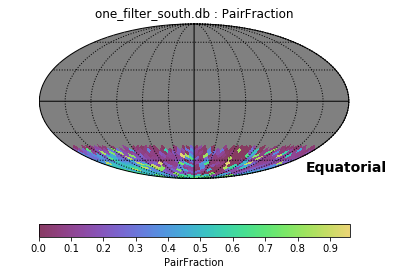

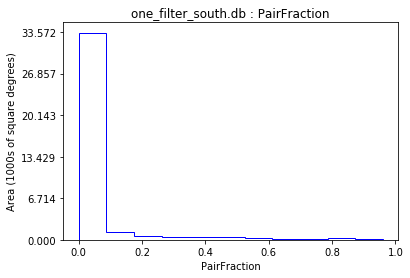

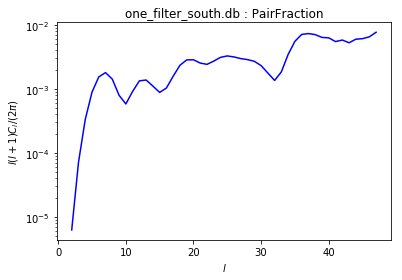

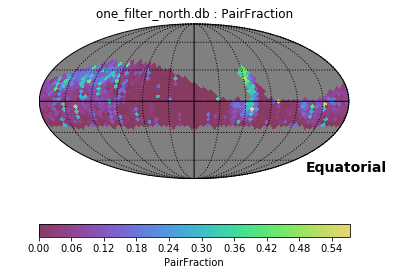

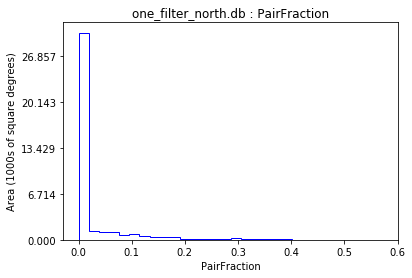

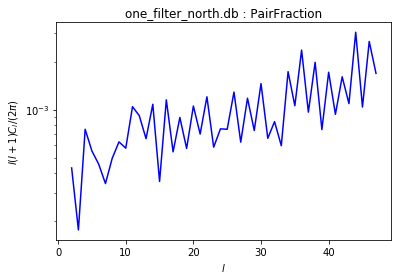

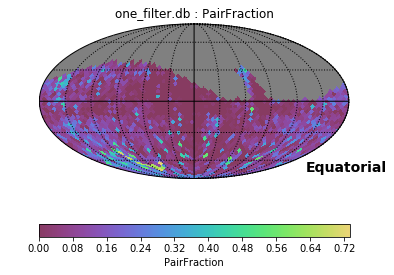

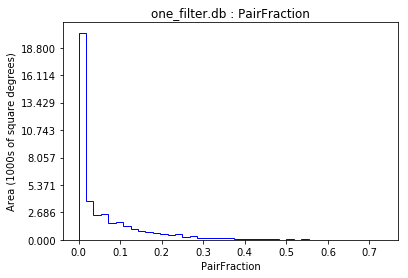

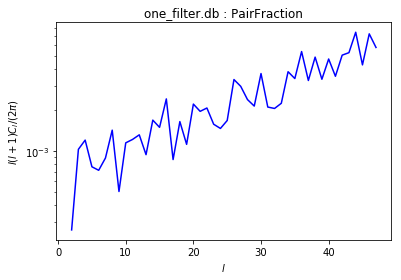

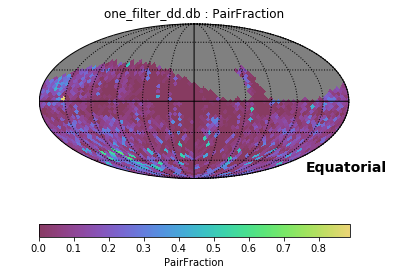

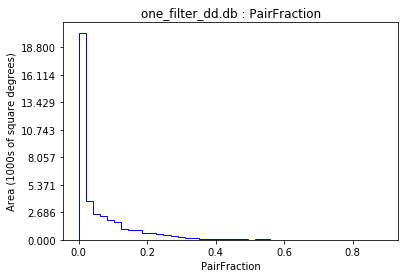

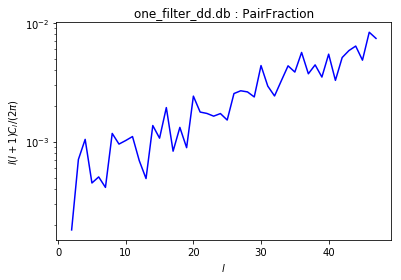

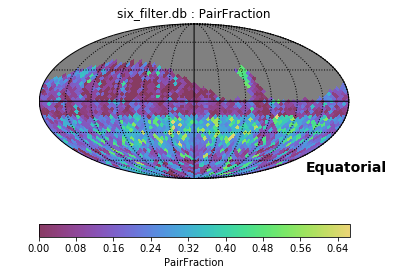

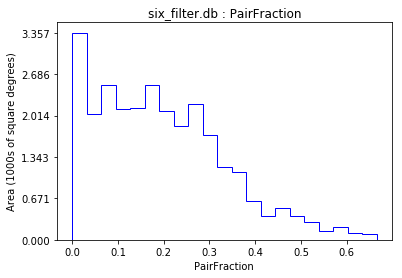

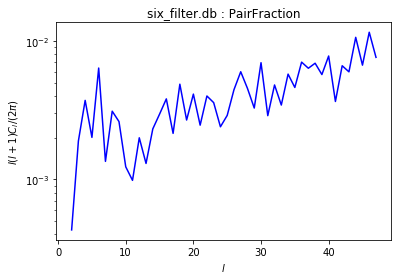

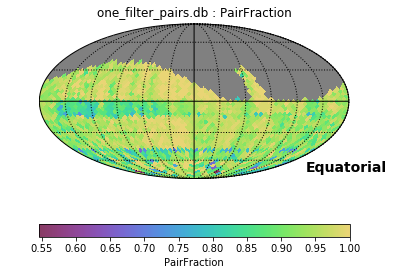

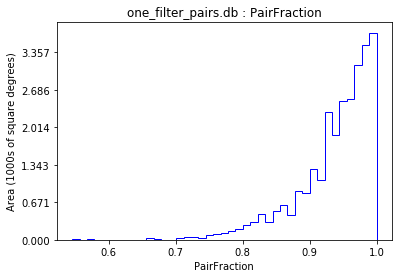

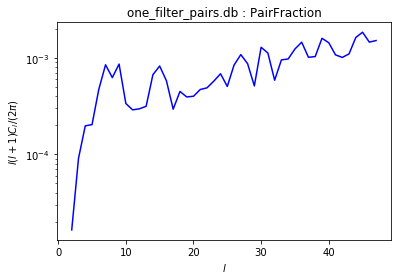

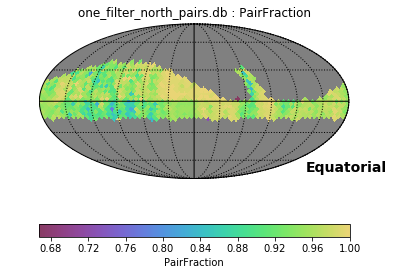

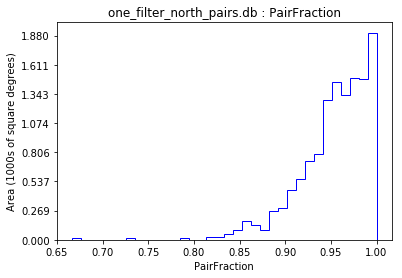

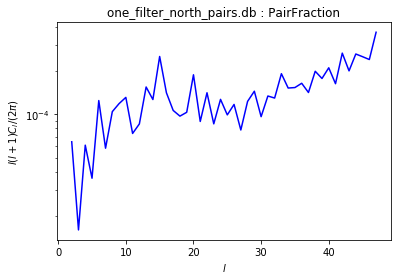

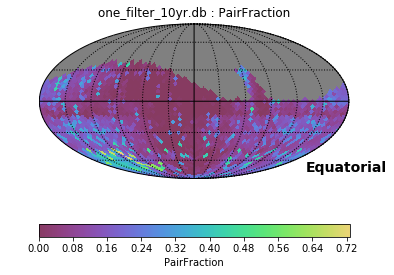

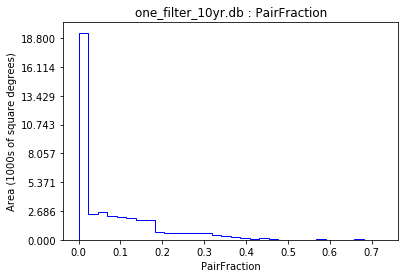

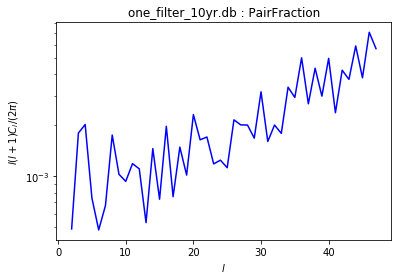

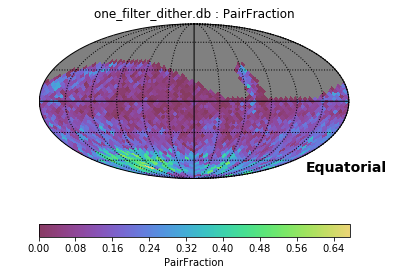

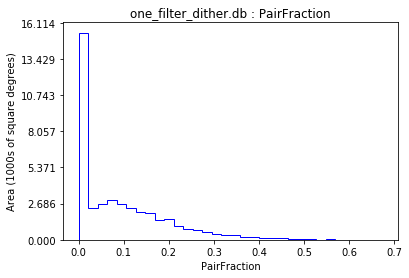

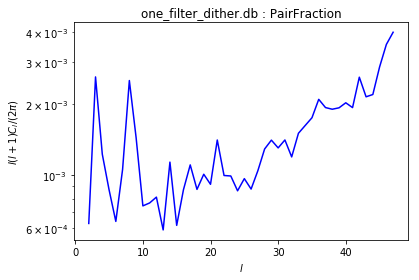

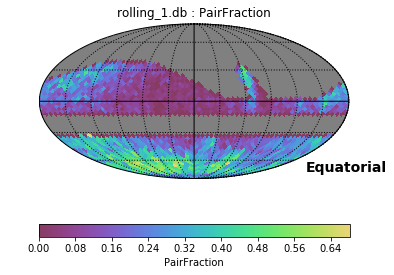

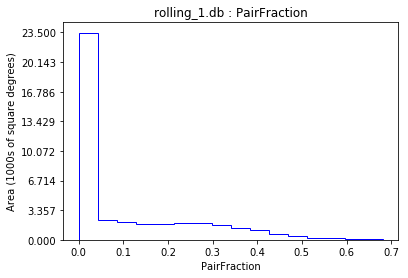

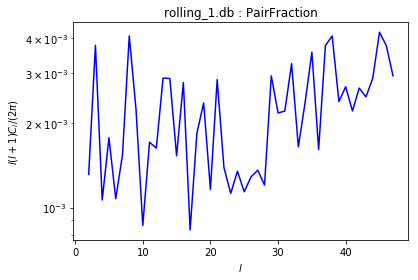

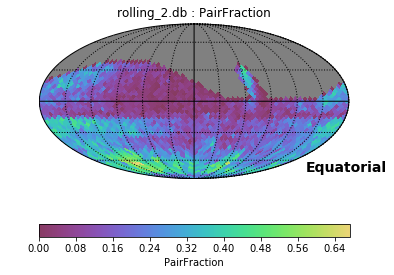

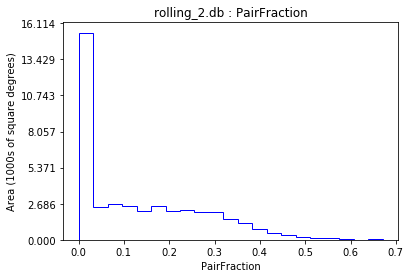

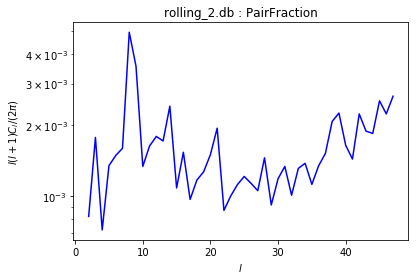

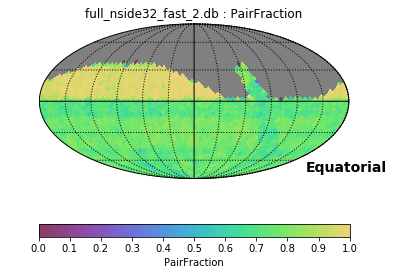

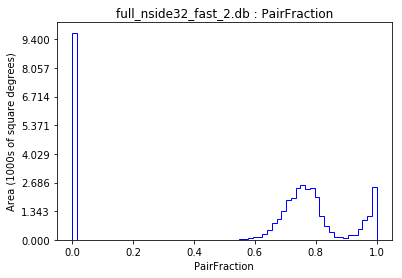

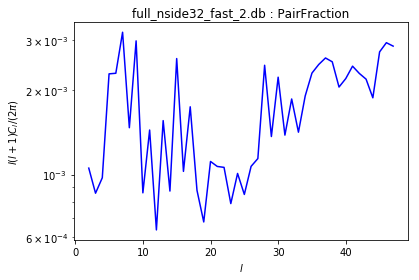

In [4]:
results = []
i=0
for conn, filename in zip(conns,files):
    bundleList = []
    sql = ''
    slicer = slicers.UniSlicer()
    metric = BruteOSFMetric(expTimeCol=colmap_dict['exptime'],
                                   mjdCol=colmap_dict['mjd'])
    bundle = metricBundles.MetricBundle(metric, slicer, sql)
    bundleList.append(bundle)
    
    stacker = stackers.NormAirmassStacker(decCol='dec')
    metric = metrics.MedianMetric(col='normairmass')
    bundle = metricBundles.MetricBundle(metric, slicer, sql, stackerList=[stacker])
    bundleList.append(bundle)
    
    slicer = slicers.HealpixSlicer(lonCol='RA', latCol='dec', nside=16)
    metric = metrics.PairFractionMetric(timeCol=colmap_dict['mjd'])
    bundle = metricBundles.MetricBundle(metric, slicer, sql)
    bundleList.append(bundle)
    for bundle in bundleList:
        bundle.setRunName(filename.split('/')[0])
    
    bd = metricBundles.makeBundlesDictFromList(bundleList)
    group = metricBundles.MetricBundleGroup(bd, conn, outDir='mafOut')
    group.runAll()
    group.plotAll(closefigs=False)
    results.append(bundleList)

In [5]:
nairs = []
osfs = []
for result in results:
    nairs.append(result[1].metricValues)
    osfs.append(result[0].metricValues)

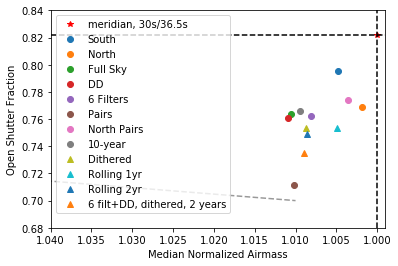

In [6]:
max_osf = 30./(32.+4.5)
plt.plot(1, max_osf, 'r*', label='meridian, 30s/36.5s')
plt.xlabel('Median Normalized Airmass')
plt.ylabel('Open Shutter Fraction')
plt.axhline(y=max_osf, linestyle='--', color='k')
plt.axvline(x=1., linestyle='--', color='k')
plt.xlim([1.04, .999])
plt.ylim([.68, .84])

for i in range(8):
    plt.plot(nairs[i], osfs[i], 'o', label=labels[i])
#plt.plot(nairs[0:2], osfs[0:2], 'ko', label='regular')
#plt.plot(nairs[2:4], osfs[2:4], 'go', label='pairs')

for i in range(8,12):
    plt.plot(nairs[i], osfs[i], '^', label=labels[i])

#reference opsim line
plt.plot([1.125,1.01], [0.755, 0.7], 'k--', alpha=0.4)
plt.legend(loc='upper left')
plt.savefig('Plots/compare_osf.pdf')